# 01 - Correlation matrix & phik-matrix - comparison

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from phik import phik_matrix
from phik.report import plot_correlation_matrix

In [4]:
# Load dataset
df = pd.read_csv("bank_numeric.csv")

# Define features and target
target_column = "deposit"

In [5]:
# Correlation Matrix (Pearson)
corr_matrix = df.corr()

In [6]:
# Phi_k Matrix
phik_matrix_result = df.phik_matrix()

interval columns not set, guessing: ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'deposit']


In [7]:
# Comparison: Extract correlations of features with the target variable
correlation_with_target = corr_matrix[target_column].drop(target_column)
phik_with_target = phik_matrix_result[target_column].drop(target_column)

comparison_df = pd.DataFrame({
    "Feature": correlation_with_target.index,
    "Pearson Correlation": correlation_with_target.values,
    "Phi_k Correlation": phik_with_target.values
})

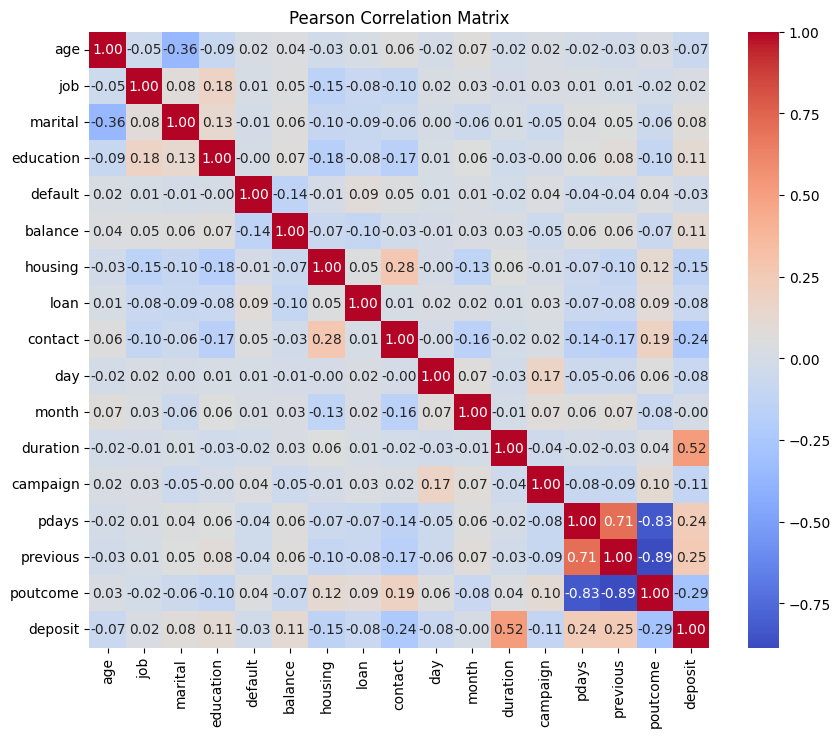

In [8]:
# Visualize Correlation Matrices
# Pearson Correlation Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Pearson Correlation Matrix")
plt.show()

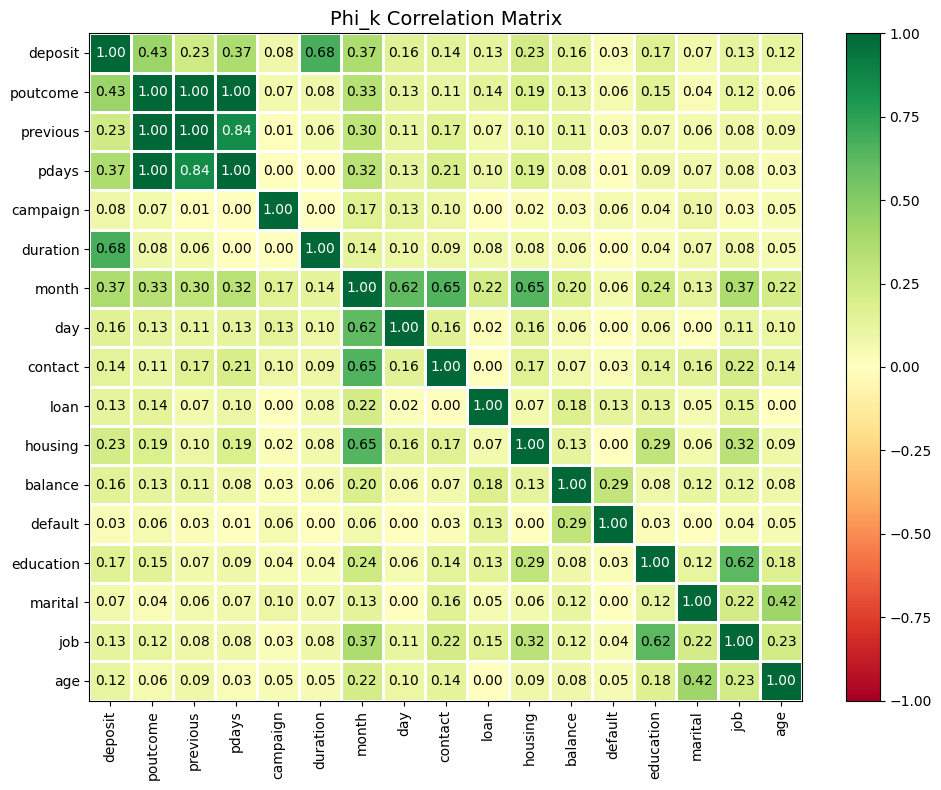

In [10]:
# Phi_k Matrix
plot_correlation_matrix(phik_matrix_result.values, 
                        x_labels=phik_matrix_result.columns, 
                        y_labels=phik_matrix_result.index,
                        title="Phi_k Correlation Matrix",
                        figsize=(10, 8))

In [ ]:
# Display Comparison of Target Correlations
print("Comparison of Correlation with Target:")
print(comparison_df)

# for easier comparison

Comparison of Correlation with Target:
      Feature  Pearson Correlation  Phi_k Correlation
0         age            -0.073356           0.122862
1         job             0.022639           0.126906
2     marital             0.076330           0.070938
3   education             0.105812           0.171648
4     default            -0.026915           0.033820
5     balance             0.110684           0.156172
6     housing            -0.146347           0.226289
7        loan            -0.081519           0.125023
8     contact            -0.236888           0.143094
9         day            -0.080099           0.159070
10      month            -0.000741           0.368607
11   duration             0.515548           0.677587
12   campaign            -0.105031           0.083433
13      pdays             0.239531           0.368748
14   previous             0.252384           0.234388
15   poutcome            -0.287127           0.434427


In [ ]:
# even though the goal of these 2 tools
# is to calculate correlations,
# it shows very different results
# that is why I decided to google how we make their calculations

# A correlation matrix typically uses metrics 
# like Pearson correlation, which measures 
# linear relationships between numeric variables.
# The Phi_k matrix is a generalized correlation 
# measure that can handle both numeric and 
# categorical variables. It measures associations 
# rather than just linear relationships.

# im my case, I have categorical variables
# and I want to explore non-linear relationships
# it means, that Phi_k Matrix is more useful for me